In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

In [2]:
datasets = os.listdir('hackathon_data')
datasets

['avk_hackathon_data_account_x_balance.csv',
 'avk_hackathon_data_party_products.csv',
 'avk_hackathon_data_party_x_socdem.csv',
 'avk_hackathon_data_story_logs.csv',
 'avk_hackathon_data_story_texts.csv',
 'avk_hackathon_data_transactions.csv',
 'baseline_model.pth.tar',
 'mappings.json',
 'party2category.pkl',
 'party2dates.pkl',
 'party2merchant_type.pkl',
 'party2sum.pkl',
 'party2trans_type.pkl']

In [5]:
dfs = {}
for name in datasets:
    if name!='avk_hackathon_data_transactions.csv':
        name1 = name.split('_')[-1][:-4]
        dfs[name1] = pd.read_csv('hackathon_data/'+name)

In [18]:
!wc -l hackathon_data/avk_hackathon_data_transactions.csv

11987618 hackathon_data/avk_hackathon_data_transactions.csv


In [56]:
trans = pd.read_csv('hackathon_data/avk_hackathon_data_transactions.csv')
trans.head()

,party_rk,account_rk,financial_account_type_cd,transaction_dttm,transaction_type_desc,transaction_amt_rur,merchant_rk,merchant_type,merchant_group_rk,category
0,20337,19666,1,2019-01-01,Покупка,84.00,88676.0,348.0,NaN,Сувениры
1,63404,72991,1,2019-01-01,Покупка,410.00,887248.0,330.0,725.0,Фаст Фуд
2,24789,23517,2,2019-01-01,Покупка,701.44,830014.0,291.0,NaN,Супермаркеты
3,57970,64838,2,2019-01-01,Покупка,6203.70,363834.0,278.0,454.0,Дом/Ремонт
4,12232,11591,2,2019-01-01,Покупка,734.53,85919.0,286.0,878.0,Супермаркеты


In [4]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11987617 entries, 0 to 11987616
Data columns (total 10 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   party_rk                   int64  
 1   account_rk                 int64  
 2   financial_account_type_cd  int64  
 3   transaction_dttm           object 
 4   transaction_type_desc      object 
 5   transaction_amt_rur        float64
 6   merchant_rk                float64
 7   merchant_type              float64
 8   merchant_group_rk          float64
 9   category                   object 
dtypes: float64(4), int64(3), object(3)
memory usage: 914.6+ MB


In [ ]:
np.isnan()

In [12]:
trans.isna().sum()

party_rk                           0
account_rk                         0
financial_account_type_cd          0
transaction_dttm                   0
transaction_type_desc              0
transaction_amt_rur                6
merchant_rk                        0
merchant_type                      0
merchant_group_rk            6222298
category                     1879352
dtype: int64

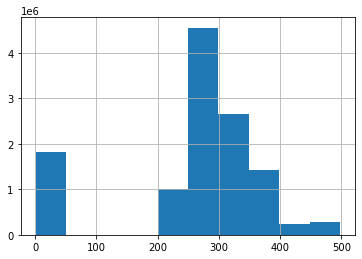

In [38]:
trans['merchant_type'].hist()

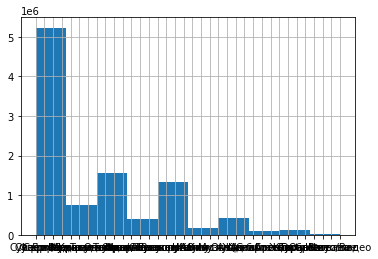

In [37]:
trans['category'].dropna().hist()

In [30]:
trans['category'].dropna().value_counts()/trans['category'].dropna().count()

Супермаркеты          0.389738
Фаст Фуд              0.099692
Транспорт             0.083105
Финансовые услуги     0.077895
Разные товары         0.052552
Рестораны             0.039702
Топливо               0.039419
Аптеки                0.030803
Наличные              0.026908
Дом/Ремонт            0.026554
Одежда/Обувь          0.025259
Красота               0.010891
Сервисные услуги      0.009953
Развлечения           0.009926
Связь/Телеком         0.009546
Автоуслуги            0.008780
Медицинские услуги    0.005627
НКО                   0.005586
Музыка                0.005398
Госсборы              0.004985
Кино                  0.004271
Аренда авто           0.003955
Книги                 0.003698
Спорттовары           0.003524
Животные              0.003424
Ж/д билеты            0.003065
Авиабилеты            0.002997
Цветы                 0.002899
Отели                 0.002896
Частные услуги        0.002418
Сувениры              0.001629
Образование           0.000891
Турагент

In [69]:
category = list(trans['category'])
merchant_type = list(trans['merchant_type'])
type2category = {}

for i in range(len(merchant_type)):
    if not (pd.isna(category[i]) or pd.isna(merchant_type[i])):
        type2category[merchant_type[i]] = category[i]

In [68]:
pd.isna(float(2))

False

In [182]:
def fill_cal(x):
    if np.isnan(x['merchant_type'])

0           False
1           False
2           False
3           False
4           False
            ...  
11987612    False
11987613    False
11987614    False
11987615    False
11987616    False
Name: merchant_type, Length: 11987617, dtype: bool

In [ ]:
trans['category'].isna()

In [125]:
print('transaction_type:')
print(trans['transaction_type_desc'].unique())
print('category:')
print(trans['category'].unique())

transaction_type:
['Покупка' 'Оплата услуг' 'Платеж' 'Снятие наличных']
category:
['Сувениры' 'Фаст Фуд' 'Супермаркеты' 'Дом/Ремонт' 'Сервисные услуги'
 'Красота' nan 'Разные товары' 'Транспорт' 'Медицинские услуги' 'Топливо'
 'Одежда/Обувь' 'Наличные' 'Связь/Телеком' 'Частные услуги'
 'Финансовые услуги' 'Рестораны' 'Развлечения' 'НКО' 'Книги' 'Кино'
 'Автоуслуги' 'Музыка' 'Отели' 'Аптеки' 'Цветы' 'Ж/д билеты' 'Авиабилеты'
 'Спорттовары' 'Госсборы' 'Аренда авто' 'Животные' 'Duty Free'
 'Турагентства' 'Образование' 'Искусство' 'Фото/Видео']


In [82]:
recommends = pd.read_csv('category_ranks.csv')
recommends.head()
party

,Unnamed: 0,Сувениры,Фаст Фуд,Супермаркеты,Дом/Ремонт,Сервисные услуги,Красота,Разные товары,Транспорт,Медицинские услуги,...,Авиабилеты,Спорттовары,Госсборы,Аренда авто,Животные,Duty Free,Турагентства,Образование,Искусство,Фото/Видео
0,20337,0.014202,0.180079,0.506184,0.170106,0.021018,0.058128,0.998895,0.040414,0.085912,...,0.013728,0.054590,0.238085,0.010160,0.395171,0.006002,0.004566,0.009067,0.002163,0.009786
1,63404,0.020584,0.699245,0.951223,0.153334,0.337638,0.279377,0.995587,0.050032,0.080982,...,0.003588,0.045954,0.017491,0.000163,0.027316,0.001257,0.001296,0.005529,0.002436,0.010585
2,24789,0.049263,0.606303,0.977950,0.946141,0.468172,0.133025,0.996112,0.888938,0.275788,...,0.034451,0.356992,0.417690,0.034195,0.166097,0.011306,0.014757,0.018707,0.004378,0.024780
3,57970,0.135153,0.991929,0.982648,0.656431,0.629166,0.315093,0.993610,0.910011,0.474760,...,0.217742,0.408947,0.432593,0.125556,0.077629,0.067885,0.076081,0.083798,0.011538,0.089123
4,12232,0.128818,0.868185,0.978059,0.744018,0.270669,0.435058,0.918604,0.215515,0.585423,...,0.085053,0.225528,0.174415,0.002395,0.073509,0.030213,0.042635,0.038482,0.011800,0.046111


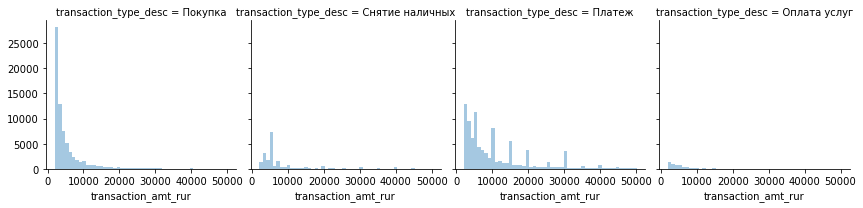

In [144]:
rule = (trans['transaction_amt_rur']<trans['transaction_amt_rur'].quantile(0.99)) & (trans['transaction_amt_rur']>trans['transaction_amt_rur'].quantile(0.8))
g = sns.FacetGrid(trans[rule], col="transaction_type_desc")
g.map(sns.distplot, "transaction_amt_rur",kde=False)

### SOCDEM starts here

In [ ]:
recommends.iloc[1]

In [74]:
set(recommends['recommendations'])

{'488.0,222.0,211.0,127.0,357.0,180.0,110.0,117.0,165.0,84.0,53.0,111.0,478.0,128.0,106.0,170.0,101.0,124.0,235.0,426.0,93.0,279.0,193.0,373.0,398.0,138.0,271.0,299.0,314.0,94.0',
 '488.0,222.0,211.0,127.0,357.0,180.0,110.0,117.0,165.0,84.0,53.0,478.0,111.0,128.0,106.0,170.0,101.0,124.0,426.0,235.0,93.0,279.0,193.0,373.0,138.0,398.0,271.0,299.0,314.0,94.0'}

In [80]:
recs = list(map(','.join,np.load('predictions.npy')))
recs[:5]

['1.0,286.0,330.0,297.0,388.0,336.0,274.0,291.0,335.0,378.0,5.0,328.0,326.0,298.0,374.0,437.0,229.0,296.0,381.0,401.0,372.0,371.0,380.0,284.0,285.0,226.0,346.0,367.0,10.0,230.0',
 '378.0,286.0,291.0,381.0,5.0,1.0,335.0,330.0,309.0,283.0,313.0,284.0,328.0,230.0,367.0,336.0,288.0,274.0,380.0,311.0,306.0,344.0,346.0,243.0,371.0,275.0,290.0,316.0,297.0,308.0',
 '1.0,381.0,286.0,291.0,378.0,274.0,297.0,284.0,330.0,5.0,229.0,336.0,335.0,296.0,9.0,323.0,328.0,230.0,275.0,285.0,380.0,491.0,372.0,437.0,342.0,241.0,322.0,10.0,436.0,355.0',
 '286.0,330.0,1.0,5.0,381.0,328.0,335.0,229.0,297.0,226.0,291.0,380.0,244.0,447.0,336.0,274.0,378.0,342.0,371.0,401.0,317.0,323.0,284.0,227.0,290.0,309.0,450.0,411.0,313.0,322.0',
 '328.0,286.0,381.0,335.0,291.0,380.0,330.0,284.0,275.0,378.0,474.0,283.0,392.0,274.0,313.0,329.0,285.0,1.0,309.0,336.0,367.0,322.0,346.0,342.0,311.0,5.0,371.0,479.0,348.0,491.0']

In [ ]:
merchant_type_inverse_mapping = {k: v for v, k in mappings['category'].items()}
def inverse_mapping(x):
    return list(map(merchant_type_inverse_mapping.get, x))

predictions = list(map(inverse_mapping, predictions))

In [29]:
dfs['socdem'].describe().drop(columns=['party_rk',region])

,age,children_cnt,region_flg
count,50000.000000,50000.000000,50000.000000
mean,39.062300,0.388660,0.091900
std,11.675057,0.968928,0.288888
min,15.000000,0.000000,0.000000
25%,30.000000,0.000000,0.000000
50%,35.000000,0.000000,0.000000
75%,45.000000,0.000000,0.000000
max,100.000000,4.000000,1.000000


In [33]:
dfs['socdem'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   party_rk             50000 non-null  int64  
 1   gender_cd            49989 non-null  object 
 2   age                  50000 non-null  float64
 3   marital_status_desc  37594 non-null  object 
 4   children_cnt         50000 non-null  int64  
 5   region_flg           50000 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 2.3+ MB


In [117]:
socdem = dfs['socdem'].drop(columns=['party_rk','region_flg'])

In [119]:
def factorize(column):
    factor = [i for i in socdem[column].dropna().unique()]
    tabs = []
    for s in factor:
        tabs.append(socdem[socdem[column]==s].describe())
        col = pd.MultiIndex.from_tuples([(s, 'age'),
                                        (s, 'children_cnt')])
        tabs[-1].columns = col
    return pd.concat(tabs, axis=1, sort=False)